# Airbnb Data Analysis for New York City

## Introduction

Airbnb, an online marketplace for lodging, has transformed the way people travel and find accommodations. In major cities like New York City, Airbnb listings provide a wide variety of options for travelers, ranging from entire apartments and homes to private rooms in shared apartments. This flexibility has made Airbnb a popular choice among both tourists and business travelers.

In this notebook, we will explore the Airbnb dataset for New York City. This dataset provides detailed information on listings available on Airbnb, including prices, locations, types of properties, and reviews. By analyzing this data, we can gain insights into the rental market in New York City, understand pricing strategies, identify popular neighborhoods, and much more.

## Dataset Description

The dataset used in this analysis is obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a website that provides publicly available data on Airbnb listings. The New York City dataset contains various attributes for each listing, including:

- **Listing ID**: A unique identifier for each Airbnb listing.
- **Name**: The name of the listing.
- **Host ID**: A unique identifier for the host.
- **Host Name**: The name of the host.
- **Neighborhood Group**: The general area or borough where the listing is located (e.g., Manhattan, Brooklyn).
- **Neighborhood**: The specific neighborhood within the borough.
- **Latitude**: The latitude coordinate of the listing.
- **Longitude**: The longitude coordinate of the listing.
- **Room Type**: The type of room being offered (e.g., entire home/apt, private room, shared room).
- **Price**: The price per night for the listing.
- **Minimum Nights**: The minimum number of nights a guest must stay.
- **Number of Reviews**: The total number of reviews for the listing.
- **Last Review**: The date of the last review.
- **Reviews per Month**: The average number of reviews per month.
- **Calculated Host Listings Count**: The total number of listings by the host.
- **Availability 365**: The number of days the listing is available in a year.

## Objectives

In this analysis, we aim to achieve the following objectives:

1. **Data Exploration**: Understand the structure and contents of the dataset through summary statistics and visualizations.
2. **Price Analysis**: Analyze the pricing strategies of different types of listings and identify factors influencing prices.
3. **Geographical Analysis**: Examine the geographical distribution of listings and identify popular neighborhoods.
4. **Review Analysis**: Investigate the review patterns and their correlation with listing popularity and price.
5. **Availability Analysis**: Analyze the availability of listings and identify trends related to booking frequency.




In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from dataprep.eda import plot, plot_correlation, plot_missing



In [85]:
# Read data

df = pd.read_csv("data/listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,72.0,30,50,2019-12-02,0.28,2,233,0,NaN
1,5136,Quiet Family Friendly Duplex w/ Patio + Backyard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,253.0,30,4,2023-08-20,0.03,1,47,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,192,2024-01-08,1.06,1,164,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,60.0,30,247,2024-03-06,1.40,1,179,3,NaN


<Figure size 1200x600 with 0 Axes>

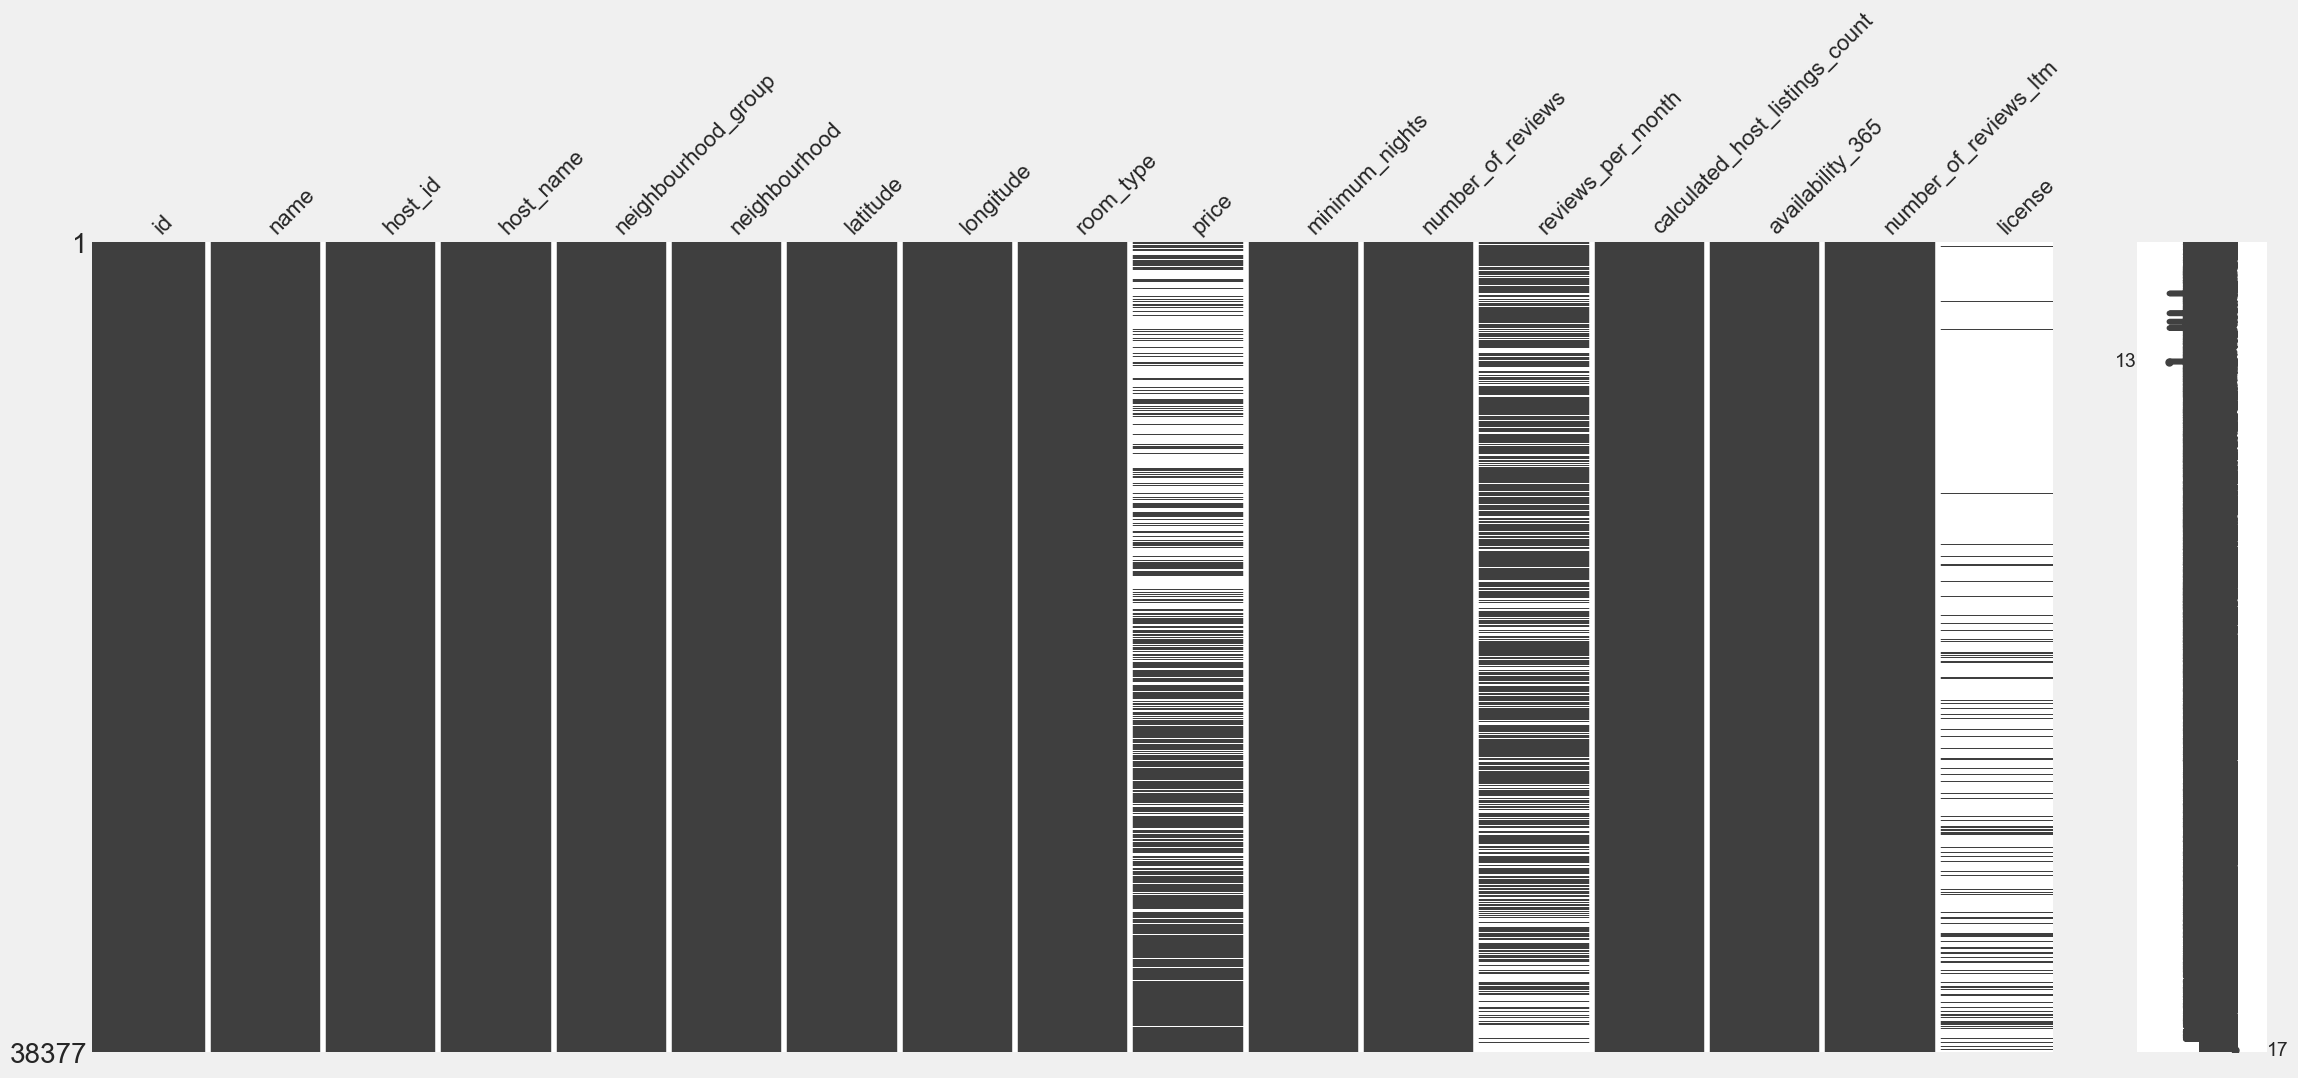

<Figure size 1200x600 with 0 Axes>

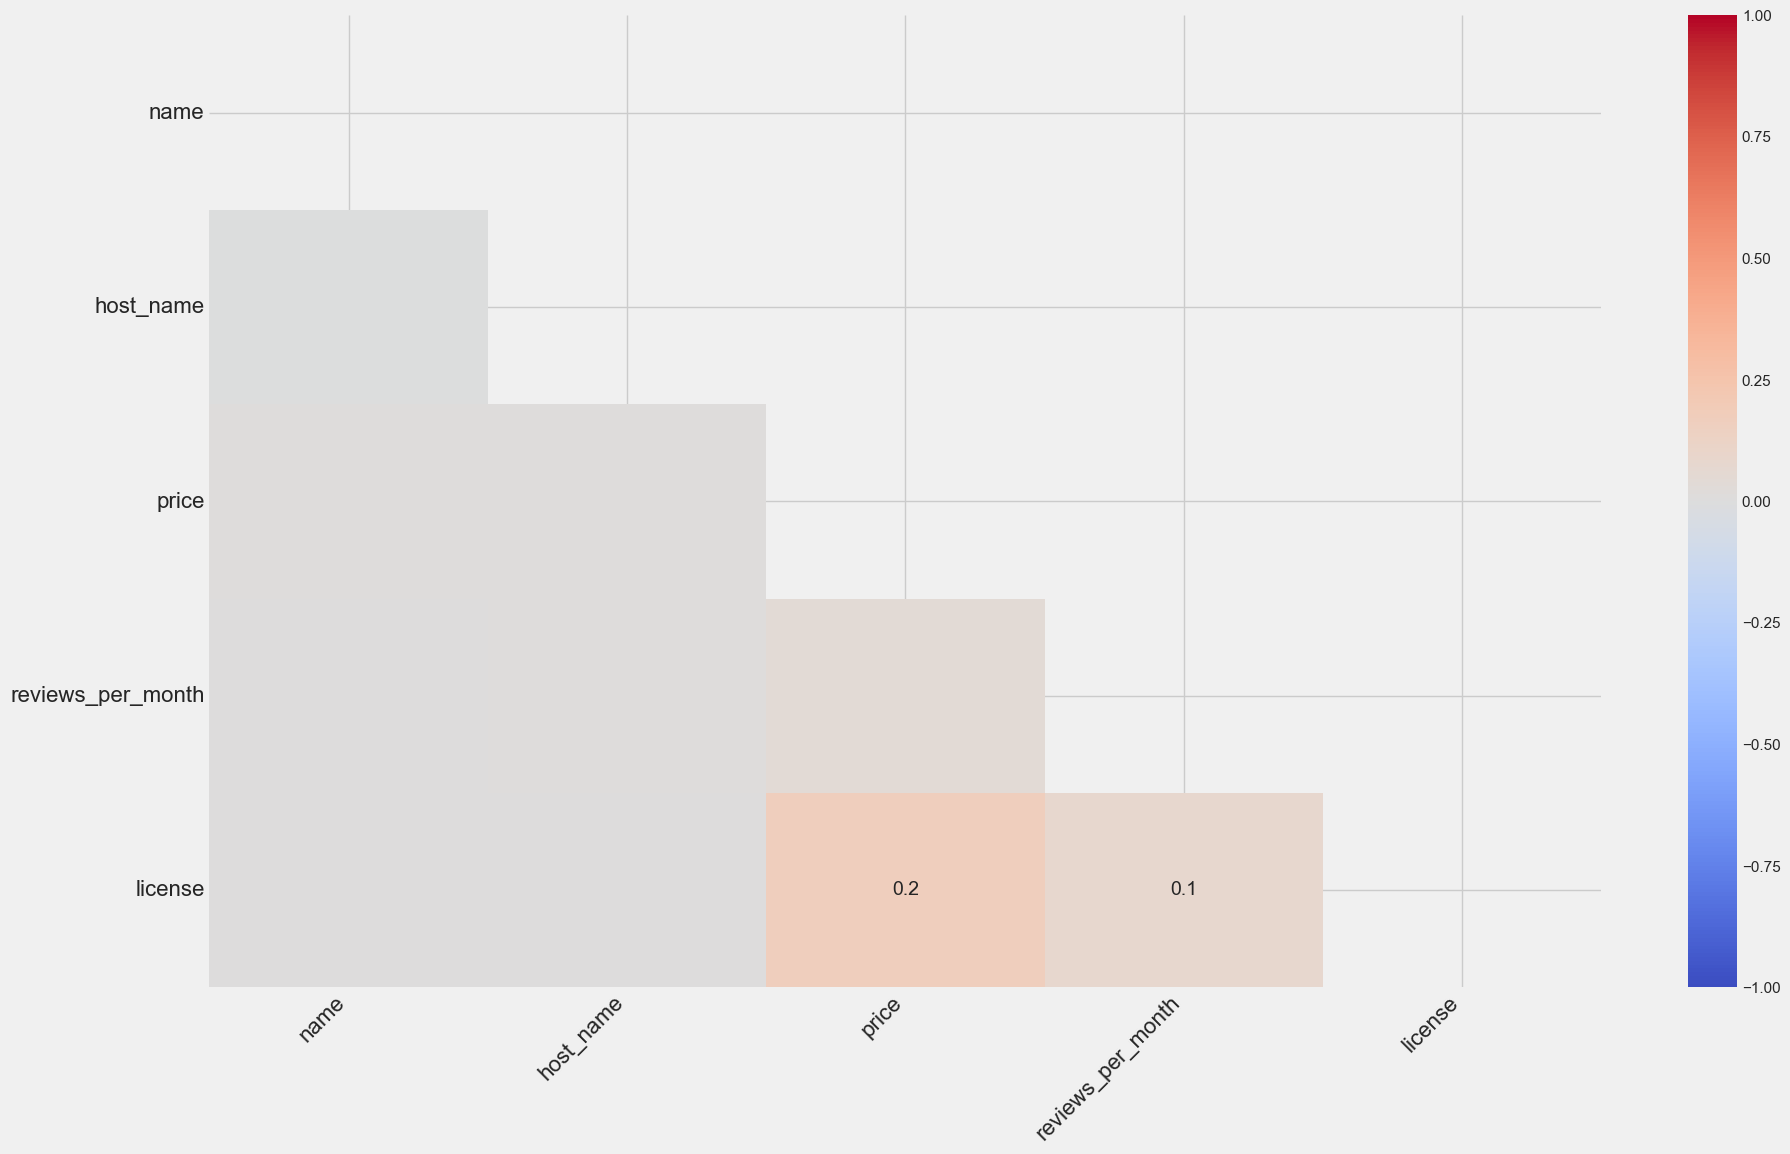

<Figure size 1200x600 with 0 Axes>

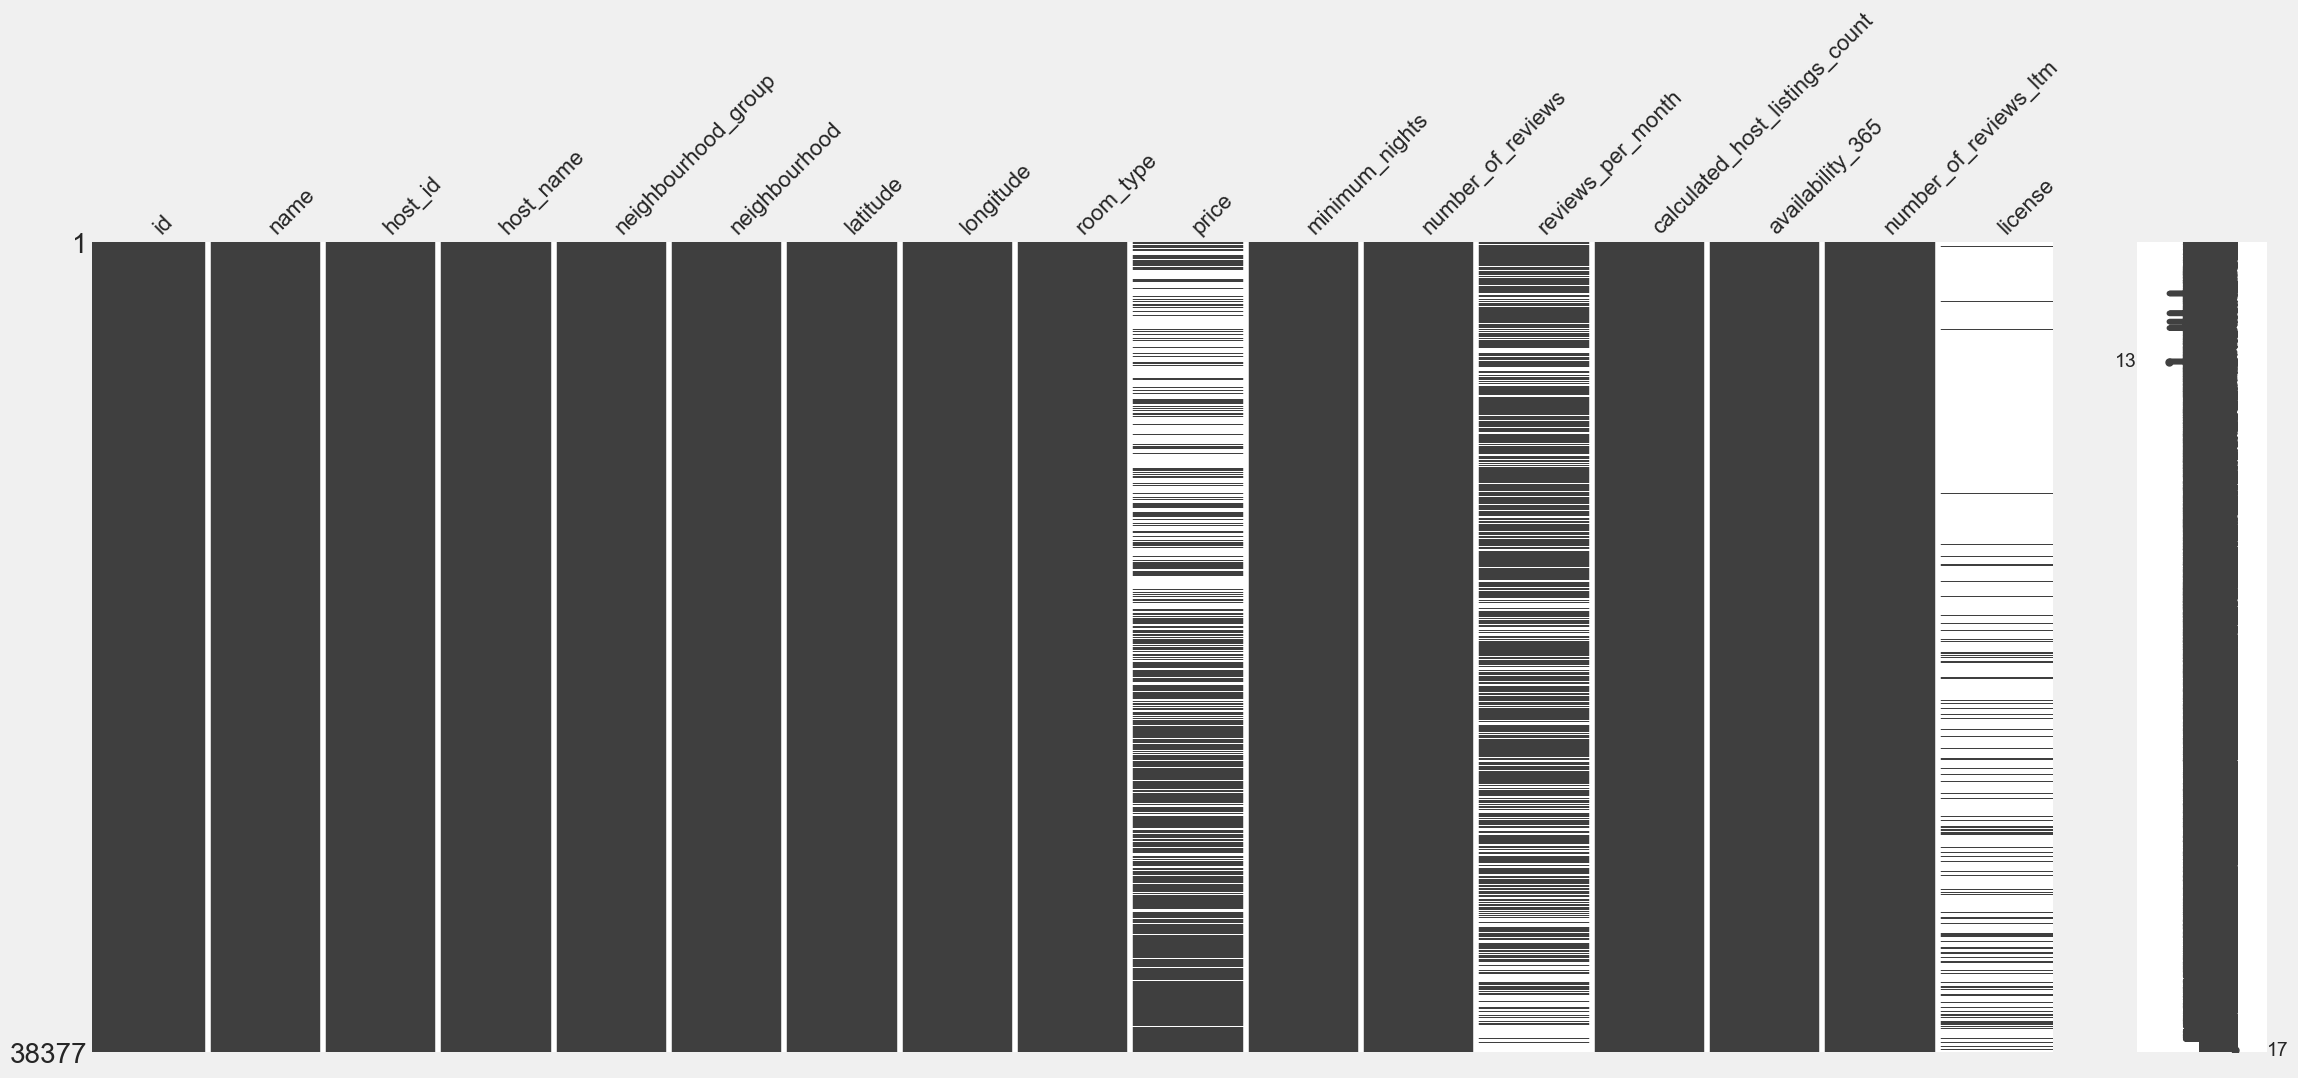

In [86]:
import missingno as msno
from sklearn.impute import SimpleImputer

# Remove the 'last_review' column
df.drop(columns=['last_review'], inplace=True)

# Visualize missing data
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.show()

# Visualize the missing data as a heatmap
plt.figure(figsize=(12, 6))
msno.heatmap(df, cmap='coolwarm')
plt.show()

df.dropna()

# Verify there are no more missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.show()

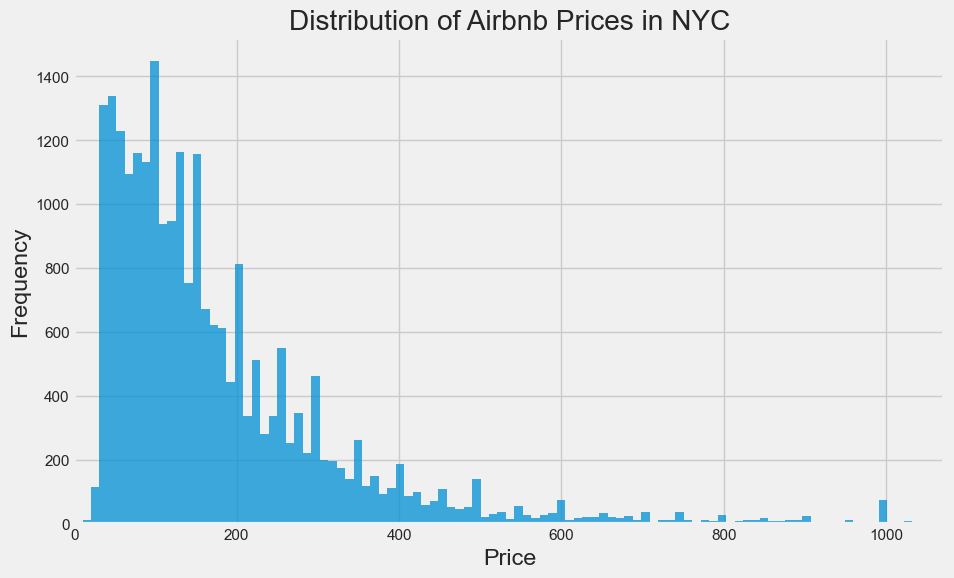

In [73]:
# Set styles for the plots
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Histogram for price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99))  # To limit the x-axis to the 99th percentile to avoid extreme outliers
plt.show()


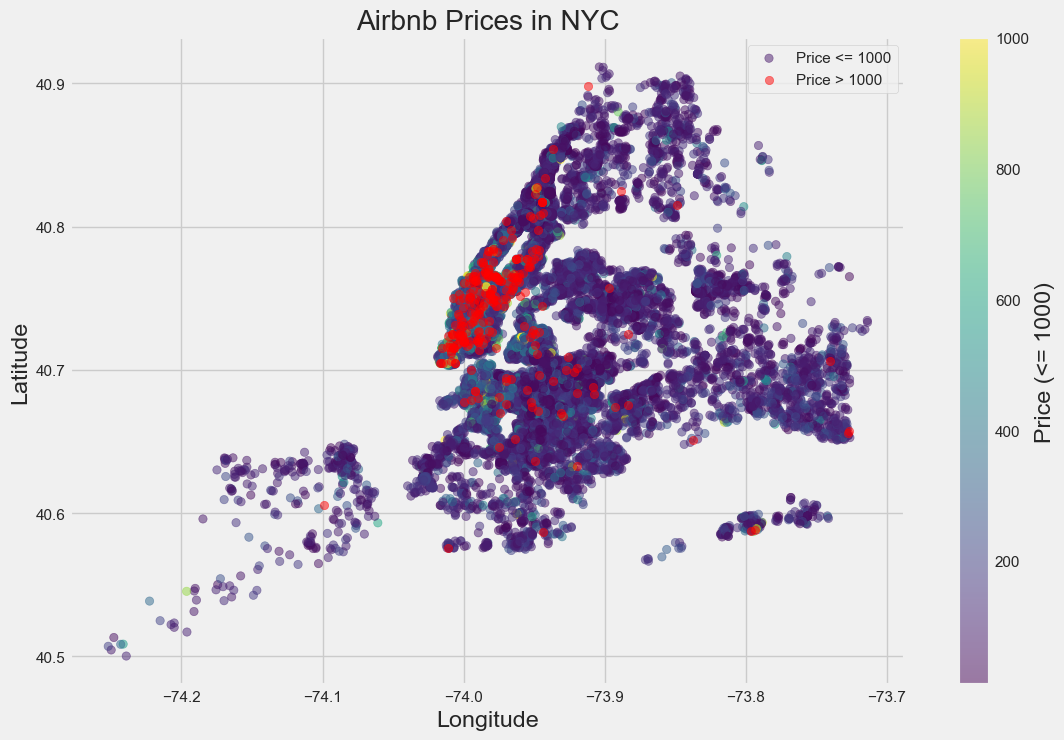

In [74]:

# Split the data into two groups
df_below_1000 = df[df['price'] <= 1000]
df_above_1000 = df[df['price'] > 1000]

# Plot the data
plt.figure(figsize=(12, 8))

# Scatter plot for prices <= 1000
sc = plt.scatter(df_below_1000['longitude'], df_below_1000['latitude'], c=df_below_1000['price'], cmap='viridis', alpha=0.5, label='Price <= 1000')

# Scatter plot for prices > 1000
plt.scatter(df_above_1000['longitude'], df_above_1000['latitude'], color='red', alpha=0.5, label='Price > 1000')

# Add color bar for the price <= 1000 points
cbar = plt.colorbar(sc, label='Price (<= 1000)')

# Add titles and labels
plt.title('Airbnb Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

The plot above shows the scatter plot of the price vs latitude-longitude. The prices above $1000 are marked by red.

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_79725/755991337.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


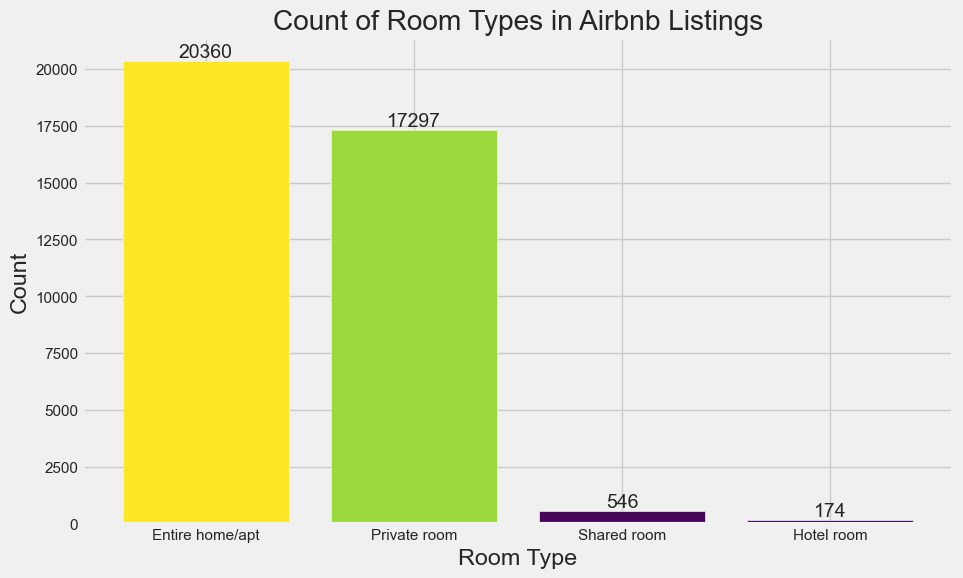

In [75]:
import matplotlib.cm as cm

# Count the occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Get the viridis colormap
cmap = cm.get_cmap('viridis')

# Normalize the color range
norm = plt.Normalize(room_type_counts.min(), room_type_counts.max())
colors = cmap(norm(room_type_counts.values))

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=colors)

# Add titles and labels
plt.title('Count of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(room_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

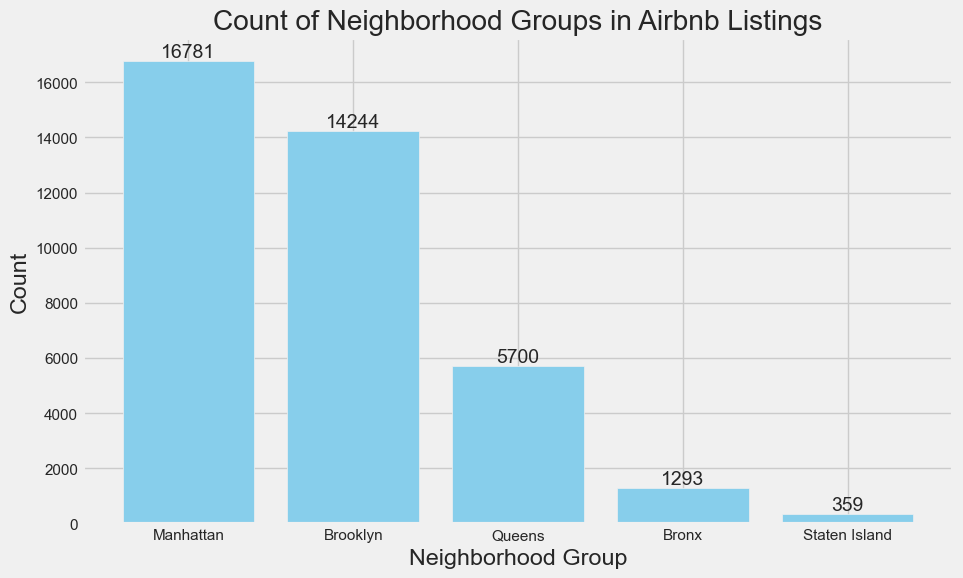

In [76]:
# Count the occurrences of each neighborhood group
neighborhood_group_counts = df['neighbourhood_group'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_group_counts.index, neighborhood_group_counts.values, color='skyblue')

# Add titles and labels
plt.title('Count of Neighborhood Groups in Airbnb Listings')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(neighborhood_group_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


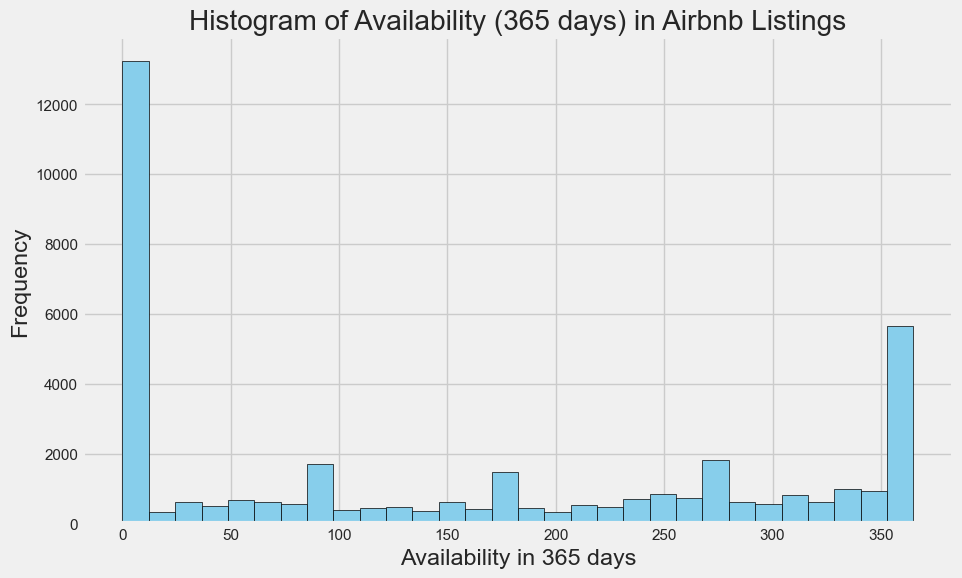

In [78]:
# Plot the histogram for availability_365
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Histogram of Availability (365 days) in Airbnb Listings')
plt.xlabel('Availability in 365 days')
plt.ylabel('Frequency')

plt.show()

In [77]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.837700e+04,3.837700e+04,38377.000000,38377.000000,23761.000000,38377.000000,38377.000000,26766.000000,38377.000000,38377.000000,38377.000000
mean,3.427767e+17,1.624298e+08,40.729011,-73.946548,206.791212,29.385257,25.329546,0.937344,48.432316,152.792245,5.206634
std,4.332098e+17,1.764375e+08,0.056519,0.054513,762.340521,30.148202,59.657697,1.739970,157.108461,142.829457,16.344325
min,5.121000e+03,1.678000e+03,40.500314,-74.251907,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.044190e+07,1.658682e+07,40.688583,-73.983020,80.000000,30.000000,0.000000,0.100000,1.000000,0.000000,0.000000
50%,4.771543e+07,7.945963e+07,40.726220,-73.954200,135.000000,30.000000,4.000000,0.350000,1.000000,124.000000,0.000000
75%,7.994417e+17,2.932387e+08,40.762580,-73.927424,230.000000,30.000000,22.000000,1.240000,7.000000,289.000000,4.000000
max,1.128312e+18,5.707128e+08,40.911390,-73.713650,100000.000000,1250.000000,1901.000000,91.220000,866.000000,365.000000,1123.000000
